# Neville's method

The file `lagrange_neville.pdf` presents some notes about the Neville's method (Kiusalaas, 2013, p. 109).

#### References

* Kiusalaas, J. Numerical methods in engineering with Python 3, 3rd edition, Cambridge University Press, 2013, ISBN 978-1-107-03385-6

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

#used for inserting images
from IPython.display import Image as img

In [2]:
x = np.linspace(0., 10., 5) # x coordinates of the data
y = np.sin(2.*np.pi*x/10.)  # data values

In [3]:
x0 = np.linspace(-3., 13., 30) # x coordinates of the interpolating points
y0 = np.sin(2.*np.pi*x0/10.)   # true values of the original function at the interpolation points

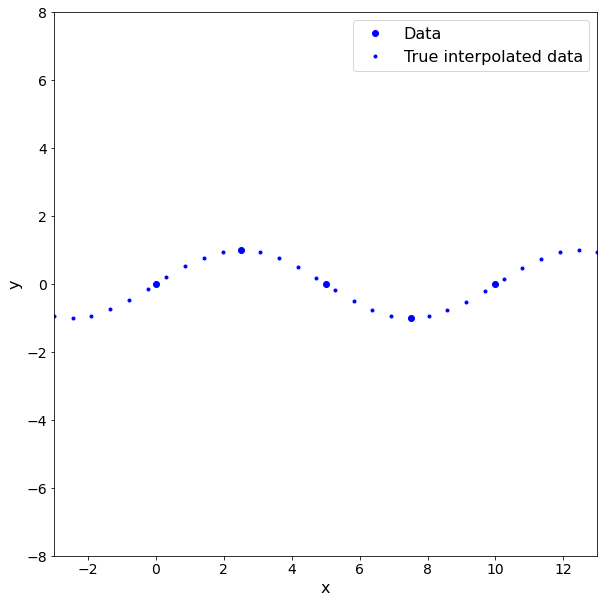

In [4]:
plt.figure(figsize=(10,10))
plt.axis('scaled')
plt.plot(x, y, 'bo', label='Data')
plt.plot(x0, y0, 'b.', label='True interpolated data')
plt.xlim(np.min(x0), np.max(x0))
plt.ylim(-8., 8.)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', numpoints=1, fontsize=16)
plt.show()

### Simple implementation

The function2 below implement the Neville's method for interpolation.

In [5]:
def my_neville(x, y, xc):
    '''
    Return an interpolated point by applying
    the Neville's method.
    
    input
    x: numpy array 1D - x coordinates
    y: numpy array 1D - given values of a function y(x)
    xc: float - coordinate x of the interpolating point
    
    output
    yc: float - interpolated ordinate at xc
    '''
    aux = y.copy()
    for j in range(1,x.size):
        for k in range(x.size-j):
            aux[k] = ((xc - x[j+k])*aux[k] + (x[k] - xc)*aux[k+1])/(x[k] - x[j+k])
        
    yc = aux[0]
    return yc

In [6]:
def my_neville2(x, y, xc):
    '''
    Return an interpolated point by applying
    the Neville's method.
    
    input
    x: numpy array 1D - x coordinates
    y: numpy array 1D - given values of a function y(x)
    xc: float - coordinate x of the interpolating point
    
    output
    yc: float - interpolated ordinate at xc
    '''
    L = x.size
    aux = y.copy()
    for j in range(1,L):
        aux[:L-j] = ((xc - x[j:])*aux[:L-j] + (x[:L-j] - xc)*aux[1:L-j+1])/(x[:L-j] - x[j:])
        
    yc = aux[0]
    return yc

### Interpolation calculated by using the functions `my_neville` and `my_neville2`

The cell below shows how to use the functions `my_neville` and `my_neville2` for interpolating the function `y` on a set of points `x0`.

In [7]:
my_result = np.empty_like(x0)
for i, xc in enumerate(x0):
    my_result[i] = my_neville(x, y, xc)

my_result2 = np.empty_like(x0)
for i, xc in enumerate(x0):
    my_result2[i] = my_neville2(x, y, xc)

### Interpolation calculated by using the function [`scipy.interpolate.lagrange`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html)

In [8]:
Lagrange = lagrange(x,y)

In [9]:
scipy_result = Lagrange(x0)

### Validation test

In [10]:
np.allclose(scipy_result, my_result)

True

In [11]:
np.allclose(scipy_result, my_result2)

True

### Results

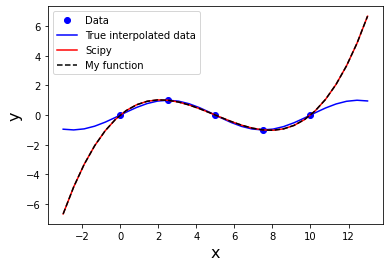

In [12]:
plt.figure()
plt.plot(x, y, 'bo', label='Data')
plt.plot(x0, y0, 'b-', label='True interpolated data')
plt.plot(x0, scipy_result, 'r-', label='Scipy')
plt.plot(x0, my_result, 'k--', label = 'My function')
plt.legend(loc='best', numpoints=1)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.legend(loc='best', numpoints=1)
plt.show()